In [1]:
import numpy as np
import pandas as pd
import sys
import matplotlib.pyplot as plt
import cv2
import os

In [2]:
path = 'F:/ml-data/car-num/tf_car_license_dataset/train_images/training-set/chinese-characters/0/1509819417_800_1.bmp'
path1 = 'F:/ml-data/car-num/tf_car_license_dataset/train_images/training-set/chinese-characters/0/1509819417_800_1_new_smaller.bmp'
img = cv2.imread(path, 2)
img1 = cv2.imread(path1, 2)


In [3]:
img_fla = np.array(img).flatten()
img_fla1 = np.array(img1).flatten()

img_arr = []
img_arr.append(img_fla)
img_arr.append(img_fla1)

img_arr = np.array(img_arr)
img_arr.shape

(2, 1280)

In [4]:
ch_train_path = 'F:/ml-data/car-num/tf_car_license_dataset/train_images/training-set/chinese-characters/'
ch_valid_path = 'F:/ml-data/car-num/tf_car_license_dataset/train_images/validation-set/chinese-characters/'


In [5]:
train_arr = []
valid_arr = []
labels = []

In [11]:
def img2arr(file_path):
    img = cv2.imread(file_path, 2)
    img_flatten = np.array(img).flatten()
    
    return img_flatten

In [16]:
def get_dataset(dataset_path):
    data = []
    target = []
    for root, dirs, files in os.walk(dataset_path):
        for d in dirs:
            data_dir = root + d
            for root1, dirs1, file1 in os.walk(data_dir):
                for f in file1:
                    data_img_path = data_dir + '/' + f
                    data_img_flatten = img2arr(data_img_path)
                    data.append(data_img_flatten)
                    label = int(d)
                    target.append(label)
    data = np.array(data)
    target = np.array(target)
    return data, target

In [17]:
train_data, train_target = get_dataset(ch_train_path)

In [18]:
train_data.shape

(1254, 1280)

In [53]:
train_target.shape

(1254,)

In [54]:
valid_data, valid_target = get_dataset(ch_valid_path)

In [55]:
valid_data.shape

(32, 1280)

In [56]:
valid_target.shape

(32,)

In [34]:
from sklearn.model_selection import train_test_split

In [37]:
train_x, test_x, train_y, test_y = train_test_split(train_data, train_target, test_size = 0.2, random_state = 1)

In [38]:
train_x.shape

(1003, 1280)

In [39]:
test_x.shape

(251, 1280)

In [49]:
def plot_cn_sample(data):
    fig, axes = plt.subplots(3, 10, figsize=(10, 8), subplot_kw = {'xticks':[], 'yticks':[]},
                           gridspec_kw = dict(hspace = 0.1, wspace = 0.1))
    for i, ax in enumerate(axes.flat):
         ax.imshow(data[i].reshape(40,32), cmap = 'binary', interpolation = 'nearest', clim=(0,16))

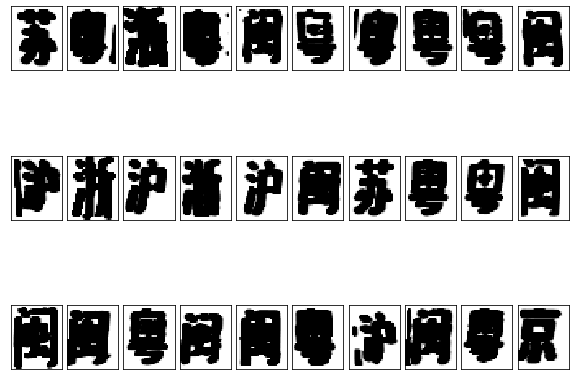

In [50]:
train_sample = train_x[:30]
plot_cn_sample(train_sample)

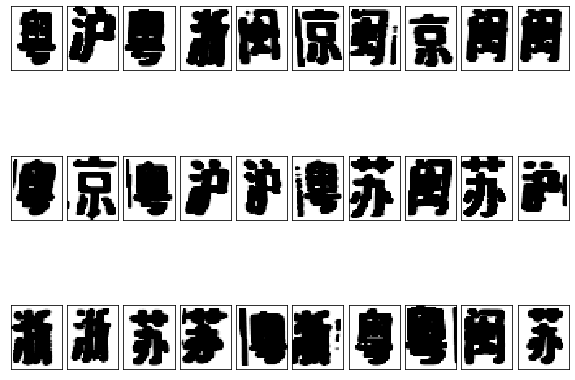

In [51]:
test_sample = test_x[:30]
plot_cn_sample(test_sample)

In [52]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, MaxPooling2D, Flatten, Dropout, BatchNormalization, Activation
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, classification_report, confusion_matrix
from keras.optimizers import Adam
from keras.wrappers.scikit_learn import KerasClassifier

Using TensorFlow backend.
d:\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
d:\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
d:\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
d:\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passing (type, 1) or '1type

In [57]:
IMG_HEIGHT = 40
IMG_WIDTH = 32

train_x = train_x.reshape(train_x.shape[0], IMG_HEIGHT, IMG_WIDTH, 1) / 255  ## 标准化
test_x = test_x.reshape(test_x.shape[0], IMG_HEIGHT, IMG_WIDTH, 1) / 255 

train_y = keras.utils.to_categorical(train_y, num_classes=6)
test_y = keras.utils.to_categorical(test_y, num_classes=6)

In [58]:
## CNN网络

model = Sequential()
model.add(Conv2D(20, (5,5), strides = 1, padding = 'same', activation = 'relu', input_shape = (IMG_HEIGHT,IMG_WIDTH, 1)))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Flatten())
model.add(Dense(80))
model.add(Activation('relu'))
model.add(Dense(6))
model.add(Activation('softmax'))
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 40, 32, 20)        520       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 20, 16, 20)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 6400)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 80)                512080    
_________________________________________________________________
activation_1 (Activation)    (None, 80)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 486       
_________________________________________________________________
activation_2 (Activation)    (None, 6)               

In [59]:
model.compile(loss = 'categorical_crossentropy',
             optimizer = 'adam',
             metrics=['accuracy'])
history = model.fit(train_x, train_y, batch_size = 100, epochs = 12, verbose=1, validation_data=(test_x, test_y), workers = -1)


Train on 1003 samples, validate on 251 samples
Epoch 1/12
1003/1003 [==============================] - 1s 686us/step - loss: 0.9993 - accuracy: 0.7139 - val_loss: 0.2421 - val_accuracy: 0.9801
Epoch 2/12
1003/1003 [==============================] - 1s 504us/step - loss: 0.1333 - accuracy: 0.9850 - val_loss: 0.0737 - val_accuracy: 0.9801
Epoch 3/12
1003/1003 [==============================] - 1s 520us/step - loss: 0.0327 - accuracy: 0.9970 - val_loss: 0.0340 - val_accuracy: 0.9841
Epoch 4/12
1003/1003 [==============================] - 1s 519us/step - loss: 0.0101 - accuracy: 1.0000 - val_loss: 0.0149 - val_accuracy: 0.9960
Epoch 5/12
1003/1003 [==============================] - 1s 566us/step - loss: 0.0056 - accuracy: 1.0000 - val_loss: 0.0069 - val_accuracy: 1.0000
Epoch 6/12
1003/1003 [==============================] - 1s 575us/step - loss: 0.0031 - accuracy: 1.0000 - val_loss: 0.0062 - val_accuracy: 1.0000
Epoch 7/12
1003/1003 [==============================] - 1s 516us/step - loss

In [60]:
score = model.evaluate(test_x, test_y, verbose=1)

251/251 [==============================] - 0s 191us/step


In [61]:
score

[0.0024275519547471962, 1.0]

In [63]:
valid_x = valid_data.reshape(valid_data.shape[0], IMG_HEIGHT, IMG_WIDTH, 1) / 255  ## 标准化
valid_y = keras.utils.to_categorical(valid_target, num_classes=6)

In [64]:
valid_score = model.evaluate(test_x, test_y, verbose=1)

251/251 [==============================] - 0s 231us/step


In [65]:
valid_score

[0.0024275519547471962, 1.0]

In [66]:
### 效果
predict_y = model.predict_classes(valid_x)
predict_y

array([0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3,
       3, 4, 4, 4, 4, 5, 5, 5, 5, 5], dtype=int64)

In [74]:
ch_dict = {
    0:'京',
    1:'闽',
    2:'粤',
    3:'苏',
    4:'沪',
    5:'浙'
}

In [88]:

plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False
def plot_cn_predict(data, predict, true):
    plt.figure(figsize=(10,8))
    for i in range(len(data)):
        plt.subplot(4, 8, i +1)
        plt.xticks([])
        plt.yticks([])
        plt.imshow(data[i].reshape(40,32), cmap="binary",  interpolation = 'nearest')
        plt.title('true: {} \npredict: {}'.format(ch_dict[predict[i]], ch_dict[true[i]]))
   

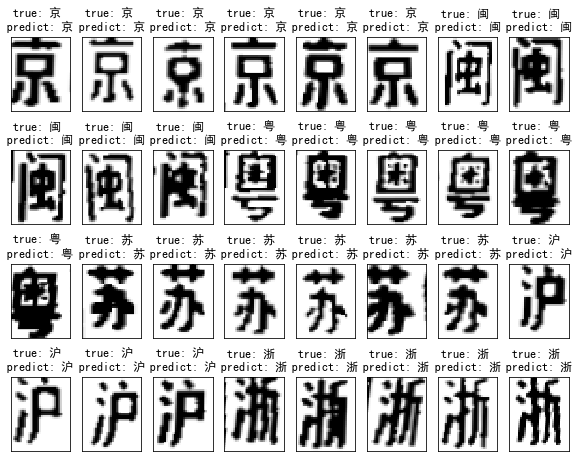

In [89]:
plot_cn_predict(valid_x, predict_y, valid_target)